In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_excel (r'D:\Universitas Indonesia\Semester 6\Pemodelan dan Pembelajaran Mesin\Code\3.Linear Regression\Dataset.xlsx')

x = df.iloc[:, 2:8]
y = df.iloc[:, 1:2]

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
y = np.ravel(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42)

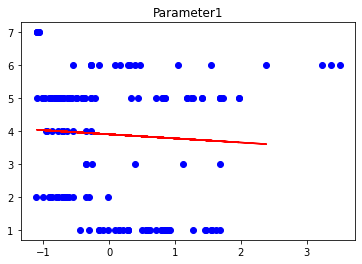

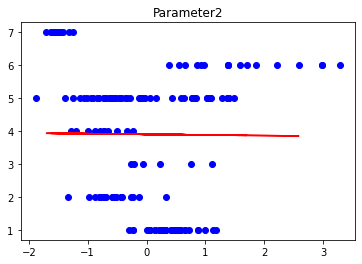

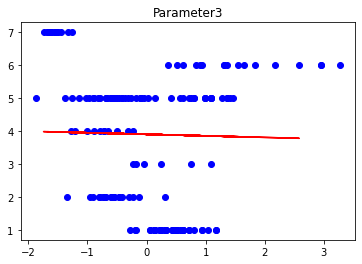

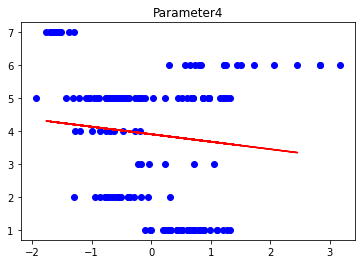

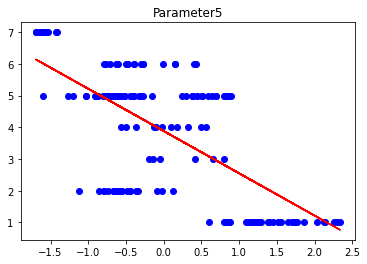

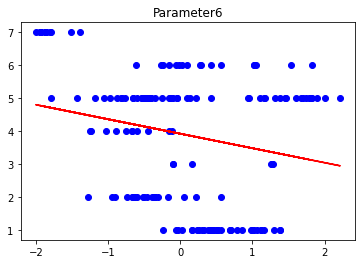

In [3]:
#Linear Regressiuon for each parameter
lr = linear_model.LinearRegression()

lr_r2 = []
lr_error = []

for i in range(0,6):
    X = x[:,i]
    X = X.reshape(-1,1)
    lr_x_train, lr_x_test, lr_y_train, lr_y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

    lr.fit(lr_x_train,lr_y_train)

    score_r2_train = lr.score(lr_x_train, lr_y_train)
    score_r2_test = lr.score(lr_x_test, lr_y_test)
    lr_r2.append((i+1, score_r2_train, score_r2_test))
    score_error_train = mean_squared_error(lr_y_train,lr.predict(lr_x_train),squared=False)
    score_error_test = mean_squared_error(lr_y_test,lr.predict(lr_x_test),squared=False)
    lr_error.append((i+1, score_error_train, score_error_test))

    #Plot Linear
    fig, ax = plt.subplots()
    ax.scatter(X,y,color='blue');
    ax.plot(lr_x_test, lr.predict(lr_x_test),color='red');
    title = "Parameter" + str((i+1))
    ax.set(title=title);

In [4]:
#Multivariate Linear Regression

mlr = linear_model.LinearRegression()
mlr.fit(x_train,y_train)


score_r2_train = mlr.score(x_train, y_train)
score_r2_test = mlr.score(x_test, y_test)    
score_error_train = mean_squared_error(y_train,mlr.predict(x_train),squared=False)
score_error_test = mean_squared_error(y_test,mlr.predict(x_test),squared=False)

lr_r2.append((7, score_r2_train,score_r2_test))
lr_error.append((7,score_error_train ,score_error_test))
lr_r2 = np.asarray(lr_r2)
lr_error = np.asarray(lr_error)  

print('Multivariate Linear Regression Train R2 Score : %.2f' % mlr.score(x_train, y_train))
print('Multivariate Linear Regression Test R2 Score : %.2f' % mlr.score(x_test, y_test))
print('Multivariate Linear Regression Train Error : %.2f'% mean_squared_error(y_train,mlr.predict(x_train),squared=False))
print('Multivariate Linear Regression Test Error : %.2f'% mean_squared_error(y_test,mlr.predict(x_test),squared=False))

Multivariate Linear Regression Train R2 Score : 0.81
Multivariate Linear Regression Test R2 Score : 0.88
Multivariate Linear Regression Train Error : 0.86
Multivariate Linear Regression Test Error : 0.76


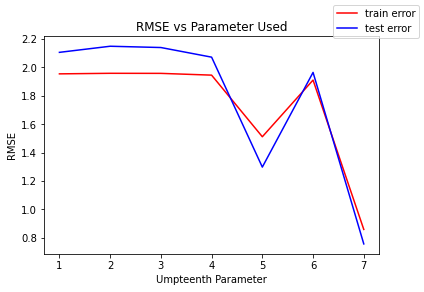

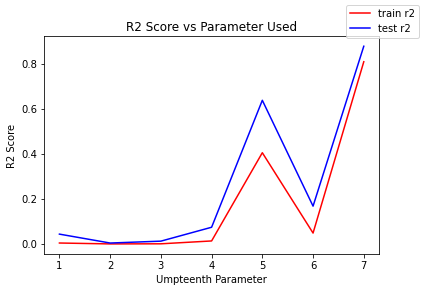

In [5]:
fig, ax = plt.subplots()
ax.plot(lr_error[:,0], lr_error[:,1],color='red');
ax.plot(lr_error[:,0], lr_error[:,2],color='blue');
fig.legend(["train error","test error"],loc="upper right")
ax.xaxis.set_ticks(np.arange(1, 8, 1))
ax.set(xlabel='Umpteenth Parameter', ylabel='RMSE', title='RMSE vs Parameter Used');

fig, ax = plt.subplots()
ax.plot(lr_r2[:,0], lr_r2[:,1],color="red");
ax.plot(lr_r2[:,0], lr_r2[:,2],color="blue");
fig.legend(["train r2","test r2"],loc="upper right")
ax.xaxis.set_ticks(np.arange(1, 8, 1))
ax.set(xlabel='Umpteenth Parameter', ylabel='R2 Score', title='R2 Score vs Parameter Used');

In [6]:
#Polynomial Regression
poly_r2 = []
poly_error = []

for i in range (1,5): 
    poly = preprocessing.PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    
    poly.fit(x_poly, y_train)
    polylr = linear_model.LinearRegression()
    polylr.fit(x_poly, y_train)
    y_pred = polylr.predict(poly.fit_transform(x_test))

    score_r2_train = polylr.score(x_poly, y_train)
    score_r2_test = polylr.score(poly.fit_transform(x_test), y_test)
    score_error_train = mean_squared_error(y_train, polylr.predict(poly.fit_transform(x_train)), squared=False)
    score_error_test = mean_squared_error(y_test,   polylr.predict(poly.fit_transform(x_test)),  squared=False)
    poly_r2.append((i, score_r2_train, score_r2_test))
    poly_error.append((i,score_error_train ,score_error_test))
    print("Done polynomials order " + str(i))

poly_r2 = np.asarray(poly_r2)
poly_error = np.asarray(poly_error)  

Done polynomials order 1
Done polynomials order 2
Done polynomials order 3
Done polynomials order 4


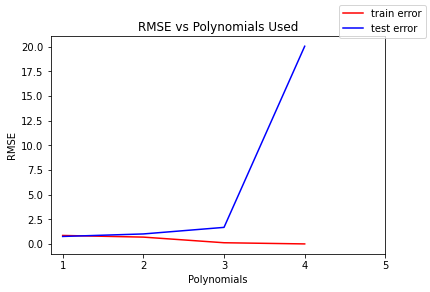

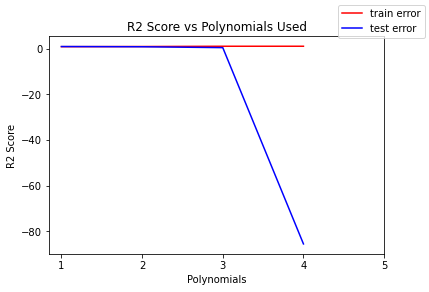

In [7]:
#Plot Polynomial Regression Result
fig, ax = plt.subplots()
ax.plot(poly_error[:,0], poly_error[:,1],color='red');
ax.plot(poly_error[:,0], poly_error[:,2],color='blue');
fig.legend(["train error","test error"],loc="upper right")
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Polynomials', ylabel='RMSE', title='RMSE vs Polynomials Used');

fig, ax = plt.subplots()
ax.plot(poly_r2[:,0], poly_r2[:,1],color="red");
ax.plot(poly_r2[:,0], poly_r2[:,2],color="blue");
fig.legend(["train error","test error"],loc="upper right")
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Polynomials', ylabel='R2 Score', title='R2 Score vs Polynomials Used');

In [8]:
#Lasso Regression
lasso_r2 = []
lasso_error = []

for i in range (1,5): 
    poly = preprocessing.PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    
    poly.fit(x_poly, y_train)
    polylr = linear_model.Lasso(alpha=0.1)
    polylr.fit(x_poly, y_train)
    y_pred = polylr.predict(poly.fit_transform(x_test))

    score_r2_train = polylr.score(x_poly, y_train)
    score_r2_test = polylr.score(poly.fit_transform(x_test), y_test)
    score_error_train = mean_squared_error(y_train, polylr.predict(poly.fit_transform(x_train)), squared=False)
    score_error_test = mean_squared_error(y_test,   polylr.predict(poly.fit_transform(x_test)),  squared=False)
    lasso_r2.append((i, score_r2_train, score_r2_test))
    lasso_error.append((i,score_error_train ,score_error_test))
    print("Done polynomials order " + str(i))

lasso_r2 = np.asarray(lasso_r2)
lasso_error = np.asarray(lasso_error)

Done polynomials order 1
Done polynomials order 2
Done polynomials order 3
Done polynomials order 4


In [9]:
#Ridge Regression
ridge_r2 = []
ridge_error = []

for i in range (1,5): 
    poly = preprocessing.PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    
    poly.fit(x_poly, y_train)
    polylr = linear_model.Ridge(alpha=0.1)
    polylr.fit(x_poly, y_train)
    y_pred = polylr.predict(poly.fit_transform(x_test))

    score_r2_train = polylr.score(x_poly, y_train)
    score_r2_test = polylr.score(poly.fit_transform(x_test), y_test)
    score_error_train = mean_squared_error(y_train, polylr.predict(poly.fit_transform(x_train)), squared=False)
    score_error_test = mean_squared_error(y_test,   polylr.predict(poly.fit_transform(x_test)),  squared=False)
    ridge_r2.append((i, score_r2_train, score_r2_test))
    ridge_error.append((i,score_error_train ,score_error_test))
    print("Done polynomials order " + str(i))

ridge_r2 = np.asarray(ridge_r2)
ridge_error = np.asarray(ridge_error)

Done polynomials order 1
Done polynomials order 2
Done polynomials order 3
Done polynomials order 4


In [10]:
#Support Vector Regression
from sklearn import svm
svr_r2 = []
svr_error = []

for i in range (1,5): 
    poly = preprocessing.PolynomialFeatures(degree = i)
    x_poly = poly.fit_transform(x_train)
    
    poly.fit(x_poly, y_train)
    polylr = svm.SVR(C=1)
    polylr.fit(x_poly, y_train)
    y_pred = polylr.predict(poly.fit_transform(x_test))

    score_r2_train = polylr.score(x_poly, y_train)
    score_r2_test = polylr.score(poly.fit_transform(x_test), y_test)
    score_error_train = mean_squared_error(y_train, polylr.predict(poly.fit_transform(x_train)), squared=False)
    score_error_test = mean_squared_error(y_test,   polylr.predict(poly.fit_transform(x_test)),  squared=False)
    svr_r2.append((i, score_r2_train, score_r2_test))
    svr_error.append((i,score_error_train ,score_error_test))
    print("Done polynomials order " + str(i))

svr_r2 = np.asarray(svr_r2)
svr_error = np.asarray(svr_error)

Done polynomials order 1
Done polynomials order 2
Done polynomials order 3
Done polynomials order 4


In [11]:
pd.DataFrame(svr_error)

,0,1,2
0,1.0,1.103899,0.879709
1,2.0,1.213091,0.991821
2,3.0,1.435939,1.271914
3,4.0,1.714728,1.726815


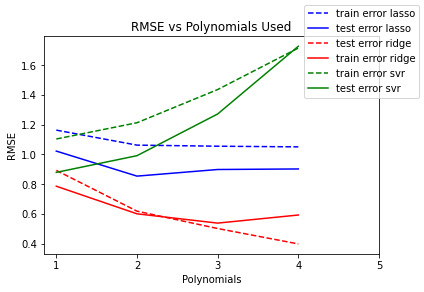

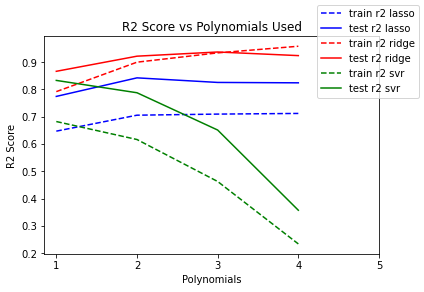

In [12]:
#Plot Polynomial Regression Result
fig, ax = plt.subplots()
ax.plot(lasso_error[:,0], lasso_error[:,1],color='blue',linestyle='--');
ax.plot(lasso_error[:,0], lasso_error[:,2],color='blue');
ax.plot(ridge_error[:,0], ridge_error[:,1],color='red',linestyle='--');
ax.plot(ridge_error[:,0], ridge_error[:,2],color='red');
ax.plot(svr_error[:,0], svr_error[:,1],color='green',linestyle='--');
ax.plot(svr_error[:,0], svr_error[:,2],color='green');
fig.legend(["train error lasso","test error lasso","test error ridge","train error ridge","train error svr", "test error svr"],loc="upper right")
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Polynomials', ylabel='RMSE', title='RMSE vs Polynomials Used');

fig, ax = plt.subplots()
ax.plot(lasso_r2[:,0], lasso_r2[:,1],color='blue',linestyle='--');
ax.plot(lasso_r2[:,0], lasso_r2[:,2],color='blue');
ax.plot(ridge_r2[:,0], ridge_r2[:,1],color='red',linestyle='--');
ax.plot(ridge_r2[:,0], ridge_r2[:,2],color='red');
ax.plot(svr_r2[:,0], svr_r2[:,1],color='green',linestyle='--');
ax.plot(svr_r2[:,0], svr_r2[:,2],color='green');
fig.legend(["train r2 lasso","test r2 lasso","train r2 ridge","test r2 ridge","train r2 svr", "test r2 svr"],loc="upper right")
ax.xaxis.set_ticks(np.arange(1, 6, 1))
ax.set(xlabel='Polynomials', ylabel='R2 Score', title='R2 Score vs Polynomials Used');